
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

## K-means Clustering


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

### PGE 383 Exercise: K-means Clustering for Subsurface Data Analytics in Python 

Here's a simple workflow, demonstration of K-means clustering for subsurface modeling workflows. This should help you get started with inferential methods to find patterns in your subsurface data sets.  

This workflow is broken up to the primary steps of:

* assign initial random prototype with labels

* assign samples to the nearest prototype label

* update prototype based on centroids of samples belonging to this prototype

* iterate until no sample assignments change

This allows us to be able to watch the method in action, as opposed to just getting a result.  I think this is more instructive.

For this workflow I have modified code from the workflow SubsurfaceDataAnalytics Clustering from Dr. Pyrcz

#### k-Means Clustering

The K-means clustering approach is primaryly applied as an unsupervised method for classification:

* **Prototype Method** - represents the training data with number of synthetic cases in the features space. For K-means clustering we assign and iteratively update $K$ prototypes.

* **Iterative Solution** - the initial prototypes are assigned randomly in the feature space, the labels for each training sample are updated to the nearest prototype, then the prototypes are adjusted to the centroid of their assigned training data, repeat until there is no further update to the training data assignments.

* **Unsupervised Learning** - the training data are not labeled and are assigned $K$ labels based on their proximity to the prototypes in the feature space.  The idea is that similar things, proximity in feature space, should belong to the same category.  

* **Feature Weighting** - the procedure depends on the 'distance' between training samples and prototypes in feature space.  Distance is treated as the 'inverse' of similarity. If the features have significantly different magnitudes, the feature(s) with the largest magnitudes and ranges will dominate the process.  One approach is to sandardize / normalize the variables.  Also, by-feature weighting may be applied.  In this demonstration we normalize the features to range from 0.0 to 1.0.

* Supervised Learning Variant for Classification of the Feature Space - applies multiple prototypes in each category to then constructs a decision boundary based on nearest prototype.  More prototypes per category results in a more complicated decision boundary in the feature space.  

#### Objective 

In the PGE 383: Subsurface Machine Learning class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV.csv at https://git.io/fjmBH.

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Install Packages

We will include the standard packages for DataFrames and ndarrays and add sci-kit-learn (sklearn) for machine learning.

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
import copy                               # for deep copies
from sklearn.cluster import KMeans        # Package for k-means clustering
import pandas.plotting as pd_plot                         # matrix scatter plots

#### Custom functions

In [3]:
def min_max(array):
    """
    Returns an array with a min-max normalization
    """
    Norm=(array-array.min())/(array.max()-array.min())
    return Norm
def return_plots(DF,kmeans,pred,Units):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    index = 0
    ax[index].scatter(DF['Norm_' + str(Feature[0])],
                      DF['Norm_' + str(Feature[1])],
                      c=pred,
                      cmap='coolwarm',
                      alpha=0.5)
    Ncentroids = kmeans.cluster_centers_
    ax[index].scatter(Ncentroids[:, 0],
                      Ncentroids[:, 1],
                      marker='o',
                      s=40,
                      color='k',
                      label='Centroids')
    ax[index].set_title('Normalized '+str(Feature[0])+' vs '+ 'Normalized '+str(Feature[1]))
    ax[index].set_ylabel('Normalized ' +str(Feature[1]))
    ax[index].set_xlabel('Normalized '+str(Feature[0]))
    ax[index].legend()
    centroids=np.zeros((Ncentroids.shape))
    centroids[:,0]=Ncentroids[:,0]*(DF[Feature[0]].max() - DF[Feature[0]].min())+DF[Feature[0]].min()
    centroids[:,1]=Ncentroids[:,1]*(DF[Feature[1]].max() - DF[Feature[1]].min())+DF[Feature[1]].min()
    index=1
    ax[index].scatter(DF[ str(Feature[0])],
                      DF[ str(Feature[1])],
                      c=pred,
                      cmap='coolwarm',
                      alpha=0.5)
    Ncentroids = kmeans.cluster_centers_
    ax[index].scatter(centroids[:, 0],
                      centroids[:, 1],
                      marker='o',
                      s=40,
                      color='k',
                      label='Centroids')
    ax[index].set_title(str(Feature[0])+' vs '+str(Feature[1]))
    ax[index].set_ylabel(str(Feature[1])+' '+str(Units[1]))
    ax[index].set_xlabel(str(Feature[0])+' '+str(Units[0]))
    ax[index].legend()

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [4]:
#os.chdir("C:/PGE383")                     # set the working directory with the input data file

#### Loading Data
Let's load the provided multivariate, spatial dataset 'unconv_MV_v1.csv'.  It is a comma delimited file with: 

* accoustic impedance (kg/m^3 x m/s x 10^6)
* brittness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD). 
* permeability (mD)

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specficy the name / variable representing that new object.

```python
df = pd.read_csv("unconv_MV_v1.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

We do this to reduce the number of data for ease of visualization (hard to see if too many points on our plots).

In [5]:
df = pd.read_csv('unconv_MV_v1.csv')    # load our data table
df=df.drop('WellIndex',axis=1)

#### Summary Statistics for Tabular Data

The table includes a summary of the data that we will work with in the demonstration below.

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.650000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.580000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.700000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.722500,49.680000,59.170000,93.470000
TOC,1000.0,1.003810,0.504978,-0.260000,0.640000,0.995000,1.360000,2.710000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.900000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.644130
Perm,1000.0,39.032654,46.293526,1.318257,13.489629,24.547089,47.863009,380.189396


#### <font color='green'>Feature selection</font>

Now it is your time to select the features you want to work with, select only two features for better visualization of your model and write down the names and units in the following array:

In [7]:
Feature=['AI','Por','Production']
Units=['kg/m^3 x m/s x 10^6', '%','MSCFD']

Make sure you enter a valid feature from the list:
* Por
* AI
* Brittle
* TOC
* VR
* Production

Let's make a subset of our data

In [8]:
df_subset = df.loc[:,Feature]              # extract Porosity and AI for a simple 2D example
df_subset.head()                          # preview the new DataFrame

,AI,Por,Production
0,3.06,15.91,177.381958
1,2.60,15.34,1479.767778
2,3.13,20.45,4421.221583
3,3.90,11.95,1488.317629
4,2.57,19.53,5261.094919


#### Feature transformation

The two features are quite incompatible.  They have dramatically different:

* magnitudes / averages

* variances / ranges

We should make a normalized version of each.  We will scale the variables to range from 0 to 1.  

* There is no distribution shape change.

We will use these normalized values for calculating distance in our workflow:

* to remove the influence of magnitude and range on our similarity calculation

In [9]:
df_kmeans=pd.DataFrame()
for i in range(len(Feature)):
    df_subset['Norm_'+str(Feature[i])] = (df[Feature[i]]-df[Feature[i]].min())/(df[Feature[i]].max() - df[Feature[i]].min())
    df_kmeans['Norm_'+str(Feature[i])]= (df[Feature[i]]-df[Feature[i]].min())/(df[Feature[i]].max() - df[Feature[i]].min())

Let's confirm that our normalized porosity and acoustic impedance now range between 0 and 1.

In [10]:
df_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Norm_AI,1000.0,0.540805,0.154446,0.000000,0.432487,0.548128,0.641711,1.00000
Norm_Por,1000.0,0.496128,0.157384,0.000000,0.387403,0.497922,0.606753,1.00000
Norm_Production,1000.0,0.178624,0.116526,0.000000,0.094594,0.157073,0.240402,1.00000


#### Some Parameters

From the summary statistics we can assign a reasonable minimum and maximum for each feature.  

* We will use this for plotting.

We will also set the random number seed to ensure that the program does the same thing everytime it is run.

* Change the seed number for a different result

We will set the number of prototypes / clusters, *K*

We define a dictionary with the color code for each cluster, $k = 1,\ldots,K$.  Given 7 codes currently, there will be an error if $K$ is set larger than 7.  Add more color codes to the dictionary to allow for mor categories.

#### Visualization of Training Data

In this exercise, we want to use K-means clustering provide facies based on acoustic impedance and porosity predictor features. 

* This allows use to group rock with similar petrophysical and geophysical properties.

Let's start by looking at the scatterplot of our training data features, porosity and acoustic impedance.  

* We will look at the data in original units and normalized units through this entire exercise.

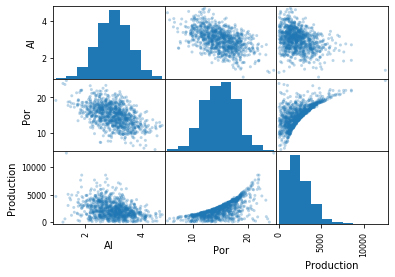

In [11]:
pd.plotting.scatter_matrix(df[Feature], alpha=0.3);

### Kmeans clustering

The workflow of Kmeans clustering:

* assign initial random prototype with labels

* assign samples to the nearest prototype label

* update prototype based on centroids of samples belonging to this prototype

* iterate until no sample assignments change

#### <font color='green'>Select number of clusters and run the code below!</font>

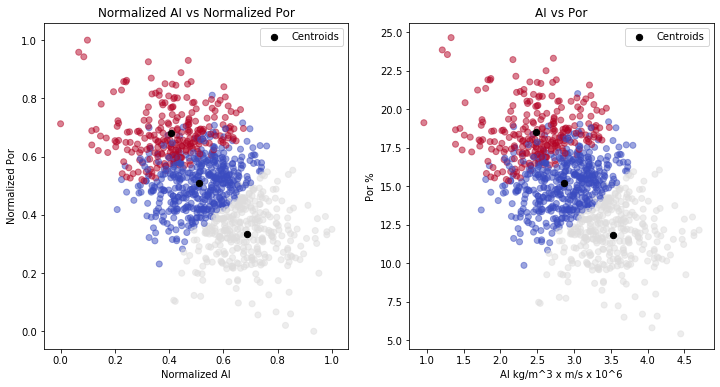

In [12]:
K = 3# number of prototypes ## ONlY thing to modify

kmeans = KMeans(n_clusters=K, n_init=10)
#kmeans.fit(df_kmeans[['Norm_' + str(Feature[0]), 'Norm_' + str(Feature[1])]])
#pred = kmeans.predict(df_subset[['Norm_' + str(Feature[0]), 'Norm_' + str(Feature[1])]])
kmeans.fit(df_kmeans)
pred = kmeans.predict(df_kmeans)

return_plots(df_subset,kmeans,pred,Units)

#### <font color='Red'>Visualization 3D what!? !</font>

In [13]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D #For 3D visualization

**Transformed features**

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=90, azim=-90)
labels = kmeans.labels_
ax.scatter(df_kmeans['Norm_' + Feature[0]],
           df_kmeans['Norm_' +Feature[1]],
           df_kmeans['Norm_' +Feature[2]],
           c=labels.astype(np.float),
           cmap='coolwarm',
           edgecolor='k')
ax.set_xlabel(str(Feature[0]))
ax.set_ylabel(str(Feature[1]))
ax.set_zlabel(str(Feature[2]))

Text(0.5, 0, 'Production')

**Original unit features**

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=90, azim=-90)
labels = kmeans.labels_
ax.scatter(df_subset[ Feature[0]],
           df_subset[Feature[1]],
           df_subset[Feature[2]],
           c=labels.astype(np.float),
           cmap='coolwarm',
           edgecolor='k')
ax.set_xlabel(str(Feature[0])+' '+str(Units[0]))
ax.set_ylabel(str(Feature[1])+' '+str(Units[0]))
ax.set_zlabel(str(Feature[2])+' '+str(Units[0]))

Text(0.5, 0, 'Production kg/m^3 x m/s x 10^6')

### Summary statistics

In [16]:
df_subset['Kmeans_cluster']=kmeans.labels_
df_subset[[Feature[0],Feature[1],'Kmeans_cluster']].groupby('Kmeans_cluster').describe(percentiles=[0.1,0.5,0.9]).transpose()

Kmeans_cluster           0           1           2
AI  count       437.000000  317.000000  246.000000
    mean          2.865149    3.527224    2.489472
    std           0.390385    0.402218    0.477562
    min           1.740000    2.520000    0.960000
    10%           2.330000    3.046000    1.860000
    50%           2.900000    3.490000    2.510000
    90%           3.334000    4.090000    3.145000
    max           3.800000    4.700000    3.480000
Por count       437.000000  317.000000  246.000000
    mean         15.211739   11.829338   18.508252
    std           1.605729    1.876508    1.691413
    min           9.850000    5.400000   15.340000
    10%          13.242000    9.684000   16.540000
    50%          15.320000   11.980000   18.180000
    90%          17.134000   14.154000   20.860000
    max          21.010000   16.050000   24.650000

#### Comments

There are so many more tests that one could attempt to gain experience with K-means clustering. I'll end here for brevity, but I invite you to continue. Consider, on your own:

* change the number of $K$ prototypes

* apply the original data (no normalization)

* apply other data sets 

* attempting methods with supervised K-means classification.  

I hope you found this tutorial useful. I'm always happy to discuss data analytics, geostatistics, statistical modeling, uncertainty modeling and machine learning,

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
